
<center><h1>Проект №2. Разведывательный анализ данных</h1></center>

# Описание проекта 

В проекте №2 курса DST_through площадки Skillfactory необходимо провести **Разведывательный анализ данных (EDA)** для датасета stud_math.csv

Основные цели EDA:

* Сформулировать предположения и гипотезы для дальнейшего построения модели.
* Проверить качество данных и очистить их, если это необходимо.
* Определиться с параметрами модели.


Задача при работе с датасетом - отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

# Этапы работы:
1. Загрузка модулей, создание DataFrame students на основе данных из файла stud_math.csv;
2. Написание функций для анализа и прдобработки данных;
3. Анализ данных по каждому признаку в отдельности, обработка пустых значений, ошибок и выбросов;
4. Корреляционный анализ количественных переменных;
5. Анализ атегориальных признаков;
6. Отбор и удаление признаков;
7. Проверка получившегося датасета и подведение итогов.

# Описание датасета

Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике

In [1]:
# загрузка модулей
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy import stats
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

# загрузка датасета
students = pd.read_csv('stud_math.csv')

In [2]:
# посмотрим на данные
display(students.sample(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
266,GP,M,17,U,GT3,NaN,3.0,1.0,services,NaN,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
63,GP,F,16,U,GT3,NaN,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,-9.0,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
105,GP,F,15,U,GT3,A,3.0,3.0,other,health,reputation,father,1.0,4.0,0.0,yes,no,no,no,yes,-12.0,yes,no,no,4.0,3.0,3.0,4.0,10.0,55.0
385,MS,F,18,R,GT3,T,2.0,2.0,at_home,other,other,NaN,NaN,3.0,0.0,no,no,yes,no,yes,-9.0,yes,NaN,no,5.0,3.0,3.0,4.0,2.0,50.0
124,GP,F,16,U,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,yes,no,yes,-6.0,yes,yes,yes,5.0,4.0,4.0,5.0,0.0,40.0
64,GP,F,15,U,LE3,T,4.0,3.0,services,services,reputation,father,1.0,2.0,0.0,yes,no,no,yes,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,2.0,0.0,50.0
119,GP,M,15,U,GT3,T,3.0,4.0,other,other,reputation,father,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,yes,no,3.0,4.0,3.0,4.0,6.0,65.0
133,GP,F,16,U,GT3,A,3.0,4.0,services,other,course,father,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,NaN,no,3.0,2.0,1.0,5.0,16.0,55.0


In [3]:
# посмотрим описание датасета
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [4]:
# посмотрим на размеры датасета
students.shape

(395, 30)

Датасет содержит:
* 395 строк (учеников);
* 30 признаков, в т.ч. целевой признак - score - оценка по математике;
* из них 13 признаков числовых, 17 строковых.

# Функции, использованные для предобработки датасета

In [5]:
def describe_column(data, column):
    '''принимает на вход датасет и выбранный признак
    для признака выводит тип значений, количество пустых строк,
    количество строк каждой категории.
    Для числовых признаков дополнительно выводится распределение и
    рисуется гистограмма
    '''
    column_type_numeric = False
    
    # печатаем тип колонки
    if data[column].dtype == "O":
        print('Признак', column, 'имеет категориальные значения.')
    elif data[column].dtype == "int64" or data[column].dtype == "float64":
        column_type_numeric = True        
        print('Признак', column, 'имеет числовые значения.')
    else:
        print('Признак', column, 'имеет тип', data[column].dtype)
    
    print()
    
    # печатаем количество пустых строк
    print('Количество пустых строк:', data[column].isna().sum())
    
    print()
    
    # печатаем значения признака
    print('Значения признака:')
    print(data[column].value_counts())
    
    print()
    
    # для числовых признаков печатаем распределение
    if column_type_numeric:
        print('Распределение значений признака:')
        print(data[column].describe())
        
        print()
        
    # для числовых признаков рисуем гистограмму
        data[column].hist()


def get_Scatter_Plot(data, column, score_column):
    '''функция принимает на вход датафрейм, два признак для сравнения
    рисует scatterplot соответствия признаков, а 
    также график полинома первой степени взаимосвязи между признаками;
    выводит значение корреляции, также p-value для теста гипотезы, 
    нулевой гипотезой которого является то, что наклон равен нулю 
    '''
    fig, ax = plt.subplots()
    # строим scatterplot
    ax.scatter(data[column], data[score_column])
    
    # строим полином зависимости score от признака column
    m, y = np.polyfit(data[column], data[score_column], 1)
    plt.plot(data[column], m * data[column] + y, '-',color="magenta")
    plt.title('{} vs {} '.format(score_column, column))
    plt.xlabel(column)
    plt.ylabel(score_column)
    plt.show()
    
    # выводим коэффициент корреляции между score и признаком column
    slope, intercept, r_value, p_value, std_err = stats.linregress(data[column], data[score_column])
    print('r - коэффициент корреляции между {} and {}: {}'.format(column, score_column, r_value))
    print()
    
    # выводим коэффициент корреляции между score и признаком column
    print('Уровень значимости нулевой гипотезы о независимости признаков: {}'.format(p_value))
    
    
def get_stat_dif(data, column, score_column):
    ''' функция принимает на вход датафрейм, два признак для сравнения.
    функция проверяет, есть ли статистическая разница в распределении оценок
    по номинативным признакам, с помощью теста Стьюдента.
    Нулевая гипотеза - распределения признаков неразличимы
    '''
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        p_value = ttest_ind(data.loc[data.loc[:, column] == comb[0], score_column], 
                        data.loc[data.loc[:, column] == comb[1], score_column]).pvalue
        if p_value <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Внимание! Найдены статистически значимые различия для признаков {} и {}'\
                 .format(column, score_column))
            break
    else:
        print('Статистические различия для признаков {} и {} не найдены '\
                 .format(column, score_column))
        
def get_boxplot(data, column, score_column):
    '''функция принимает на вход датафрейм, два признака.
    рисует boxplot распределения признака column
    '''
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y=score_column, 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

Теперь разберемся с каждой колонкой отдельно.

# Score
Начнем с целевой переменной

In [6]:
# проверям пустые значения
students.score.isna().sum()

6

In [7]:
# сохраним строик с пустым score, возможно они понадобятся на валидации
# в основном датасете удаляем эти строки
students_empty_score = students[students.score.isna()]

students = students[students.score.isna() == False]

In [8]:
# проверям пустые значения после удаления
students.score.isna().sum()

0

In [9]:
# проверяем размеры после удаления
students.shape

(389, 30)

In [10]:
# смотрим на значения
students.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

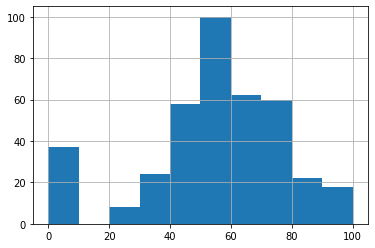

In [11]:
students.score.hist()

Распределение похоже на нормальное, картину сиильно портит большое количество нулевых значений. Нужно понять, оставлять их или нет

In [12]:
# сколько нулевых значений
print('Учеников с нулевой оценкой - {:.2%}'
      .format(len(students[students.score == 0].index)/len(students.index)))

Учеников с нулевой оценкой - 9.51%


25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


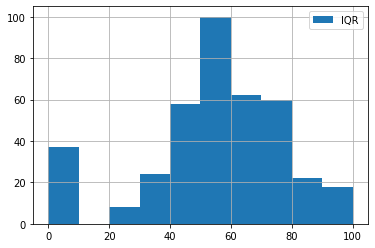

In [13]:
median = students.score.median()
IQR = students.score.quantile(0.75) - students.score.quantile(0.25)
perc25 = students.score.quantile(0.25)
perc75 = students.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


students_score_plot = students.score[students.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
students_score_plot.hist(bins = 10,label = 'IQR')
plt.legend();

Получаем, что ученики с нулевой оценкой значимы для нас, их выбрасывать нельзя. Границы выбросов выходят за 100-бальную оценку. 

# Absences 

Признак absences имеет числовые значения.

Количество пустых строк: 11

Значения признака:
0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
3.0        7
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Распределение значений признака:
count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64



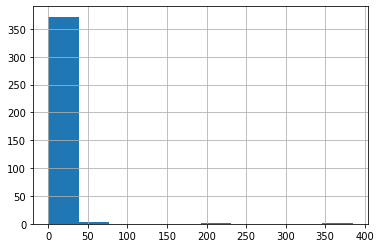

In [14]:
# смотрим на значения
describe_column(students, 'absences')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


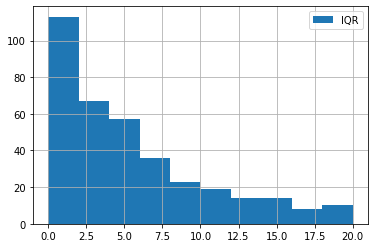

In [15]:
median = students.absences.median()
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


students_absences_plot = students.absences[students.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
students_absences_plot.hist(bins = 10,label = 'IQR')
plt.legend();

In [16]:
# посмотрим на предполагаемые выбросы в колонке absences
# рассмотрим данные больше 0.75-квантиля

students_absentee = students[students.absences > perc75]
students_absentee.sort_values('absences')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
346,GP,M,18,R,GT3,T,4.0,3.0,teacher,services,course,mother,1.0,3.0,0.0,no,no,no,no,yes,-9.0,yes,yes,yes,5.0,3.0,2.0,4.0,9.0,80.0
317,GP,F,18,U,GT3,T,4.0,3.0,other,other,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,NaN,3.0,4.0,5.0,9.0,45.0
289,GP,M,18,U,LE3,A,4.0,4.0,teacher,teacher,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,3.0,2.0,9.0,75.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
369,MS,F,18,R,GT3,T,4.0,4.0,other,teacher,other,father,3.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,yes,3.0,2.0,2.0,5.0,10.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


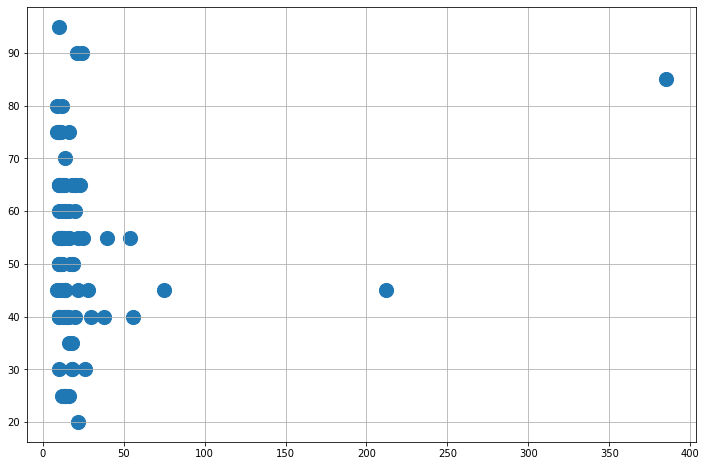

In [17]:
# как распределены оценки в зависимости от прогулов у "прогульщиков"
f, ax = plt.subplots(figsize=(12,8))
ax.scatter(students_absentee.absences, students_absentee.score, s=200)
ax.grid()
plt.show()

Видно, что данные распределены достаточно плотно до уровня 40 прогулов. 

Посмотрим, сколько процентов датасета придется удалить, если считать выбросами значения, больше $perc75 + 1.5*IQR$

In [18]:
students_absentee = students[students.absences > perc75 + 1.5*IQR]

print('Учеников с большим количеством прогулов - {:.2%}'
      .format(len(students_absentee.index)/len(students.index)))

Учеников с большим количеством прогулов - 4.37%


Как видно, если отсекать выбросы, используя расчеты с интерквантильным расстоянием, то выбросим более 4 процентов датасета. 

Предлагаю отсекать выбросы значением $absences = 40.0$, потому что данные до этого значения расположены достаточно плотно, а также это позволит сохранить максимум информации из этого маленького датасета.

In [19]:
students_absentee = students[students.absences > 40.0]

print('Учеников с большим количеством прогулов - {:.2%}'
      .format(len(students_absentee.index)/len(students.index)))

Учеников с большим количеством прогулов - 1.29%


In [20]:
# удаляем выбросы в признаке absences
students = students[students.absences <= 40.0]

In [21]:
# проверяем размеры датасета после удаления
students.shape

(373, 30)

Таким образом,удалены выбросы по колонке absence.

Теперь заполним пустые строки медианным значением.

In [22]:
students.absences = students.absences.fillna(students.absences.median())

# проверим количество пустых строк
students.absences.isna().sum()

0

# School

In [23]:
# смотрим на значения
describe_column(students, 'school')

Признак school имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
GP    330
MS     43
Name: school, dtype: int64



В колонке **school** нет пустых строк, в датасете присутствуют только две школы. Большая часть учеников учится в школе с аббревиатурой GP, остальные в MS.

Оставляем как есть, данные готовы для One-Hot Encoding

# Sex

In [24]:
# смотрим на значения
describe_column(students, 'sex')

Признак sex имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
F    197
M    176
Name: sex, dtype: int64



В колонке **sex** нет пустых строк, в датасете присутствуют только два пола. Большая часть учеников в датасете девушки.

Оставляем как есть, данные готовы для One-Hot Encoding

# Age

Признак age имеет числовые значения.

Количество пустых строк: 0

Значения признака:
16    99
17    93
15    80
18    76
19    21
20     2
22     1
21     1
Name: age, dtype: int64

Распределение значений признака:
count    373.000000
mean      16.662198
std        1.265163
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64



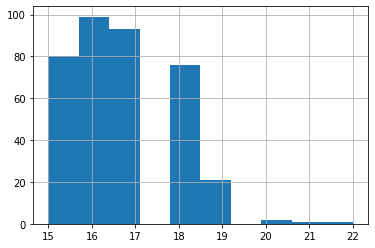

In [25]:
# смотрим на значения
describe_column(students, 'age')

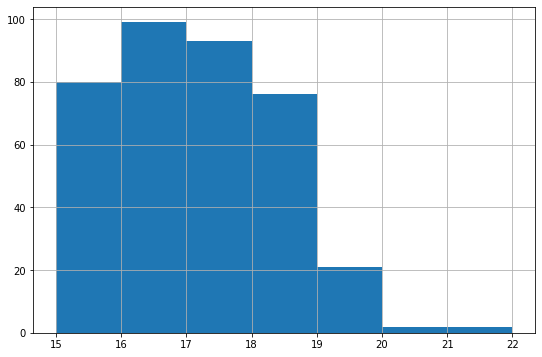

In [26]:
# визуализируем распределение другим манером
f, ax = plt.subplots(figsize=(9,6))
ax.hist(students.age, bins=np.arange(students.age.min(), students.age.max()+1))
ax.grid()
plt.show()

В колонке **Age** нет пустых строк, в датасете присутствуют только два пола. Данные распределены хорошо, выбросов нет. Большая часть учеников в возрасте 15 - 19 лет, в датасете содержатся данные по возрастам 15-22 года

# Address

In [27]:
# смотрим на значения
describe_column(students, 'address')

Признак address имеет категориальные значения.

Количество пустых строк: 14

Значения признака:
U    280
R     79
Name: address, dtype: int64



In [28]:
# сколько пустых значений
print('Учеников без указания адреса - {:.2%}'
      .format(len(students[students.address.isna()].index)/len(students.index)))

Учеников без указания адреса - 3.75%


В колонке **Address** 14 пустых значений (3.75% от всего датасета).Большая часть учеников живет в городе (значение 'U').

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('U'), либо новым значением(например, 'unknown').

Я выбрал последний вариант.

In [29]:
# заполняем пустые строки новым значением
students.address = students.address.fillna('unknown')

# проверяем количество пустых строк
students.address.isna().sum()

0

# Famsize

In [30]:
# смотрим на значения
describe_column(students, 'famsize')

Признак famsize имеет категориальные значения.

Количество пустых строк: 24

Значения признака:
GT3    249
LE3    100
Name: famsize, dtype: int64



В данной колонке видим 24 пропущенных значений. 
Предлагается такая обработка:
* заполняем пустые значения famsize 0,
* значения "LE3" меняем на 1,
* значения "GT3" меняем на 2.

In [31]:
# создается новый признак - famsize_isNAN, равная 1, если famsize было не заполнено;
# students['famsize_isNAN'] = pd.isna(students.famsize).astype('uint8')

In [32]:
students.famsize = students.famsize.apply(lambda s: 1 if s=='LE3' else (2 if s=='GT3' else 0))

In [33]:
# проверяем полученные значения
students.famsize.value_counts()

2    249
1    100
0     24
Name: famsize, dtype: int64

Также был возможен вариант - заполнить значение не 0, а саым популярным значением - GT3.

# Pstatus 

In [34]:
# смотрим на значения
describe_column(students, 'Pstatus')

Признак Pstatus имеет категориальные значения.

Количество пустых строк: 42

Значения признака:
T    297
A     34
Name: Pstatus, dtype: int64



В колонке Pstatus 42 пустых строк. Большая часть родителей живут вместе.

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('T'), либо новым значением(например, 'unknown').

Я выбрал последний вариант.

In [35]:
# заполняем пустые строки новым значением
students.Pstatus = students.Pstatus.fillna('unknown')

# проверяем количество пустых строк
students.Pstatus.isna().sum()

0

# Medu 

Признак Medu имеет числовые значения.

Количество пустых строк: 3

Значения признака:
4.0    128
2.0     95
3.0     91
1.0     53
0.0      3
Name: Medu, dtype: int64

Распределение значений признака:
count    370.000000
mean       2.778378
std        1.096715
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64



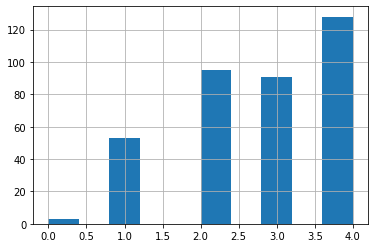

In [36]:
# смотрим на значения
describe_column(students, 'Medu')

Хотя значение и числовое - на самом деле оно категориальное. Поэтому в хорошем случае нужно сделать One-Hot Encoding и 5 новых признаков.

В колонке **Medu** есть 3 пустых записи. Варианты заполнения - либо 0, либо медианой 3.0.

Я выбрал последний вариант.

In [37]:
# заполняем пустые строки новым значением
students.Medu = students.Medu.fillna(students.Medu.median())

# проверяем количество пустых строк
students.Medu.isna().sum()

0

# Fedu 

Признак Fedu имеет числовые значения.

Количество пустых строк: 24

Значения признака:
2.0     101
3.0      89
4.0      83
1.0      73
0.0       2
40.0      1
Name: Fedu, dtype: int64

Распределение значений признака:
count    349.000000
mean       2.618911
std        2.282061
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64



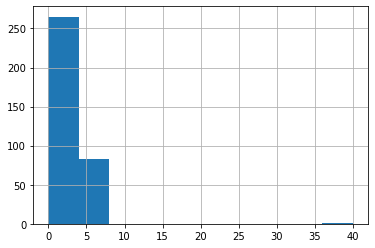

In [38]:
# смотрим на значения
describe_column(students, 'Fedu')

Хотя значение и числовое - на самом деле оно категориальное. Поэтому в хорошем случае нужно сделать One-Hot Encoding и 5 новых признаков.

В колонке **Fedu** есть 24 пустых записи. Варианты заполнения - либо 0, либо медианой 3.0

Есть ошибка заполнения - указано значение 40.
Вариант исправления - удалить или поменять на 4.0.

In [39]:
# исправляем ошибку ввода
students.loc[students.Fedu == 40.0, 'Fedu'] = 4.0

In [40]:
# заполняем пустые строки новым значением
students.Fedu = students.Fedu.fillna(students.Fedu.median())

Признак Fedu имеет числовые значения.

Количество пустых строк: 0

Значения признака:
2.0    125
3.0     89
4.0     84
1.0     73
0.0      2
Name: Fedu, dtype: int64

Распределение значений признака:
count    373.000000
mean       2.482574
std        1.061467
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64



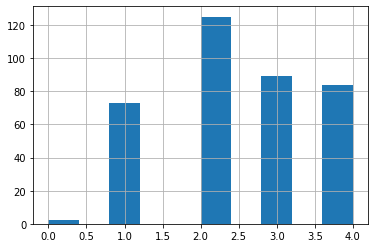

In [41]:
# проверяем все исправления
describe_column(students, 'Fedu')

# Mjob

In [42]:
# смотрим на значения
describe_column(students, 'Mjob')

Признак Mjob имеет категориальные значения.

Количество пустых строк: 18

Значения признака:
other       121
services     93
at_home      56
teacher      53
health       32
Name: Mjob, dtype: int64



Признак **Mjob** категориальный. Есть 18 пустых строк, принимает 5 уникальных значений.

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('other'), либо новым значением(например, 'unknown').

Я выбрал последний вариант.

In [43]:
# заполняем пустые строки новым значением
students.Mjob = students.Mjob.fillna('unknown')

In [44]:
# проверяем все исправления
describe_column(students, 'Mjob')

Признак Mjob имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
other       121
services     93
at_home      56
teacher      53
health       32
unknown      18
Name: Mjob, dtype: int64



# Fjob 

In [45]:
# смотрим на значения
describe_column(students, 'Fjob')

Признак Fjob имеет категориальные значения.

Количество пустых строк: 35

Значения признака:
other       188
services     94
teacher      26
at_home      16
health       14
Name: Fjob, dtype: int64



Признак **Fjob** категориальный. Есть 35 пустых строк, принимает 5 уникальных значений.

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('other'), либо новым значением(например, 'unknown').

Я выбрал последний вариант.

In [46]:
# заполняем пустые строки новым значением
students.Fjob = students.Fjob.fillna('unknown')

In [47]:
# проверяем все исправления
describe_column(students, 'Fjob')

Признак Fjob имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
other       188
services     94
unknown      35
teacher      26
at_home      16
health       14
Name: Fjob, dtype: int64



# Reason

In [48]:
# смотрим на значения
describe_column(students, 'reason')

Признак reason имеет категориальные значения.

Количество пустых строк: 17

Значения признака:
course        128
home           99
reputation     97
other          32
Name: reason, dtype: int64



Признак **Reason** категориальный. Есть 17 пустых строк, принимает 4 уникальных значения.

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('course'), либо новым значением(например, 'unknown').

Я выбрал последний вариант.

In [49]:
# заполняем пустые строки новым значением
students.reason = students.reason.fillna('unknown')

In [50]:
# проверяем все исправления
describe_column(students, 'reason')

Признак reason имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
course        128
home           99
reputation     97
other          32
unknown        17
Name: reason, dtype: int64



# Guardian 

In [51]:
# смотрим на значения
describe_column(students, 'guardian')

Признак guardian имеет категориальные значения.

Количество пустых строк: 30

Значения признака:
mother    235
father     84
other      24
Name: guardian, dtype: int64



Признак **guardian** категориальный. Есть 31 пустая строка, принимает 3 уникальных значения.

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('mother'), либо новым значением(например, 'unknown').

Я выбрал последний вариант.

In [52]:
# заполняем пустые строки новым значением
students.guardian = students.guardian.fillna('unknown')

In [53]:
# проверяем все исправления
describe_column(students, 'guardian')

Признак guardian имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
mother     235
father      84
unknown     30
other       24
Name: guardian, dtype: int64



# Traveltime 

Признак traveltime имеет числовые значения.

Количество пустых строк: 28

Значения признака:
1.0    226
2.0     91
3.0     21
4.0      7
Name: traveltime, dtype: int64

Распределение значений признака:
count    345.000000
mean       1.446377
std        0.701448
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64



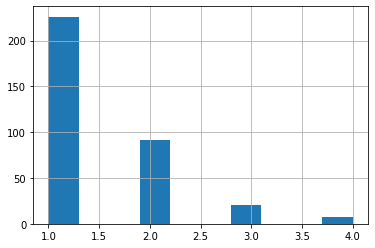

In [54]:
# смотрим на значения
describe_column(students, 'traveltime')

Признак **traveltime** числовой, но на самом деле он категориальный. Есть 28 пустых строк, принимает 4 уникальных значения. Выбросов нет.

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('1.0'), либо медианой ('2.0').

Я выбрал последний вариант.

In [55]:
# заполняем пустые строки новым значением
students.traveltime = students.traveltime.fillna(students.traveltime.median())

In [56]:
# проверяем наличие пустых строк
students.traveltime.isna().sum()

0

# Studytime

Признак studytime имеет числовые значения.

Количество пустых строк: 5

Значения признака:
2.0    180
1.0    100
3.0     61
4.0     27
Name: studytime, dtype: int64

Распределение значений признака:
count    368.000000
mean       2.040761
std        0.855163
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64



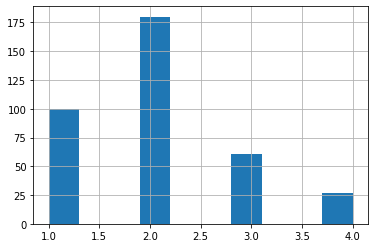

In [57]:
# смотрим на значения
describe_column(students, 'studytime')

Признак **studytime** числовой, но на самом деле он категориальный. Есть 5 пустых строк, принимает 4 уникальных значения. Выбросов нет.

Пустые строки можно удалить, а можно заполнить самым популярным значением и медианой ('2.0').

Я выбрал последний вариант.

In [58]:
# заполняем пустые строки новым значением
students.studytime = students.studytime.fillna(students.studytime.median())

In [59]:
# проверяем наличие пустых строк
students.studytime.isna().sum()

0

# studytime, granular

In [60]:
# переименуем колонку в удобный для обработки вид
students = students.rename(columns={"studytime, granular": "studytime_granular"})

Признак studytime_granular имеет числовые значения.

Количество пустых строк: 5

Значения признака:
-6.0     180
-3.0     100
-9.0      61
-12.0     27
Name: studytime_granular, dtype: int64

Распределение значений признака:
count    368.000000
mean      -6.122283
std        2.565490
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64



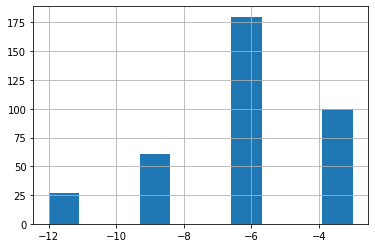

In [61]:
# смотрим на значения
describe_column(students, 'studytime_granular')

Признак **studytime_granular** числовой, но на самом деле он категориальный. Есть 5 пустых строк, принимает 4 уникальных значения. Выбросов нет.

Предположение - признак получен из признака **studytime** умножением на -3. Проверим это.

In [62]:
studytime_analize = students.studytime.apply(lambda x: -3*x)

In [63]:
studytime_diff = studytime_analize - students.studytime_granular
studytime_diff[studytime_diff != 0]

17    NaN
91    NaN
112   NaN
266   NaN
314   NaN
dtype: float64

Да, значения колонки совпадают с точностью до 5 не заполненных строк в studytime_granular.

Пустые строки можно удалить, а можно заполнить самым популярным значением и медианой ('-6.0').

Я выбрал последний вариант.

In [64]:
# заполняем пустые строки новым значением
students.studytime_granular = students.studytime_granular\
                              .fillna(students.studytime_granular.median())

In [65]:
# проверяем наличие пустых строк
students.studytime_granular.isna().sum()

0

# Failures

Признак failures имеет числовые значения.

Количество пустых строк: 22

Значения признака:
0.0    277
1.0     47
2.0     14
3.0     13
Name: failures, dtype: int64

Распределение значений признака:
count    351.000000
mean       0.324786
std        0.723038
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64



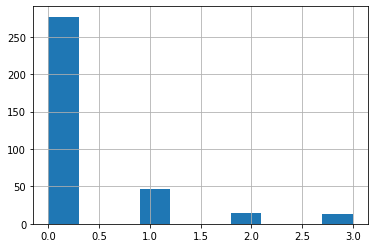

In [66]:
# смотрим на значения
describe_column(students, 'failures')

Признак **failures** числовой, но на самом деле он категориальный. Есть 22 пустых строки, принимает 4 уникальных значения. Выбросов нет.

Пустые строки можно удалить, а можно заполнить самым популярным значением и медианой ('0.0').

Я выбрал последний вариант.

In [67]:
# заполняем пустые строки новым значением
students.failures = students.failures.fillna(students.failures.median())

In [68]:
# проверяем наличие пустых строк
students.failures.isna().sum()

0

# Schoolsup

In [69]:
# смотрим на значения
describe_column(students, 'schoolsup')

Признак schoolsup имеет категориальные значения.

Количество пустых строк: 9

Значения признака:
no     318
yes     46
Name: schoolsup, dtype: int64



Признак **schoolsup** категориальный. Есть 9 пустых строк, принимает 2 уникальных значения.

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('no'), либо новым значением(например, 'unknown').

Я выбрал последний вариант.

In [70]:
# заполняем пустые строки новым значением
students.schoolsup = students.schoolsup.fillna('unknown')

In [71]:
# смотрим на значения
describe_column(students, 'schoolsup')

Признак schoolsup имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
no         318
yes         46
unknown      9
Name: schoolsup, dtype: int64



# Famsup

In [72]:
# смотрим на значения
describe_column(students, 'famsup')

Признак famsup имеет категориальные значения.

Количество пустых строк: 36

Значения признака:
yes    208
no     129
Name: famsup, dtype: int64



Признак **famsup** категориальный. Есть 36 пустых строк, принимает 2 уникальных значения.

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('yes'), либо новым значением(например, 'unknown').

Я выбрал последний вариант.

In [73]:
# заполняем пустые строки новым значением
students.famsup = students.famsup.fillna('unknown')

In [74]:
# смотрим на значения
describe_column(students, 'famsup')

Признак famsup имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
yes        208
no         129
unknown     36
Name: famsup, dtype: int64



# Paid 

In [75]:
# смотрим на значения
describe_column(students, 'paid')

Признак paid имеет категориальные значения.

Количество пустых строк: 38

Значения признака:
no     189
yes    146
Name: paid, dtype: int64



Признак **paid** категориальный. Есть 38 пустых строк, принимает 2 уникальных значения.

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('no'), либо новым значением(например, 'unknown').

Я выбрал последний вариант.

In [76]:
# заполняем пустые строки новым значением
students.paid = students.paid.fillna('unknown')

In [77]:
# смотрим на значения
describe_column(students, 'paid')

Признак paid имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
no         189
yes        146
unknown     38
Name: paid, dtype: int64



# Activities

In [78]:
# смотрим на значения
describe_column(students, 'activities')

Признак activities имеет категориальные значения.

Количество пустых строк: 14

Значения признака:
yes    185
no     174
Name: activities, dtype: int64



Признак **activities** категориальный. Есть 14 пустых строк, принимает 2 уникальных значения.

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('yes'), либо новым значением(например, 'unknown').

Я выбрал последний вариант.


In [79]:
# заполняем пустые строки новым значением
students.activities = students.activities.fillna('unknown')

In [80]:
# смотрим на значения
describe_column(students, 'activities')

Признак activities имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
yes        185
no         174
unknown     14
Name: activities, dtype: int64



# Nursery 

In [81]:
# смотрим на значения
describe_column(students, 'nursery')

Признак nursery имеет категориальные значения.

Количество пустых строк: 15

Значения признака:
yes    285
no      73
Name: nursery, dtype: int64



Признак **nursery** категориальный. Есть 15 пустых строк, принимает 2 уникальных значения.

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('yes'), либо новым значением(например, 'unknown').

Я выбрал последний вариант.

In [82]:
# заполняем пустые строки новым значением
students.nursery = students.nursery.fillna('unknown')

In [83]:
# смотрим на значения
describe_column(students, 'nursery')

Признак nursery имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
yes        285
no          73
unknown     15
Name: nursery, dtype: int64



# Higher 

In [84]:
# смотрим на значения
describe_column(students, 'higher')

Признак higher имеет категориальные значения.

Количество пустых строк: 19

Значения признака:
yes    338
no      16
Name: higher, dtype: int64



Признак **higher** категориальный. Есть 19 пустых строк, принимает 2 уникальных значения.

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('yes'), либо новым значением(например, 'unknown').

Я выбрал последний вариант.

In [85]:
# заполняем пустые строки новым значением
students.higher = students.higher.fillna('unknown')

In [86]:
# смотрим на значения
describe_column(students, 'higher')

Признак higher имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
yes        338
unknown     19
no          16
Name: higher, dtype: int64



# Internet 

In [87]:
# смотрим на значения
describe_column(students, 'internet')

Признак internet имеет категориальные значения.

Количество пустых строк: 33

Значения признака:
yes    286
no      54
Name: internet, dtype: int64



Признак **internet** категориальный. Есть 33 пустых строки, принимает 2 уникальных значения.

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('yes'), либо новым значением(например, 'unknown').

Я выбрал последний вариант.

In [88]:
# заполняем пустые строки новым значением
students.internet = students.internet.fillna('unknown')

In [89]:
# смотрим на значения
describe_column(students, 'internet')

Признак internet имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
yes        286
no          54
unknown     33
Name: internet, dtype: int64



# Romantic 

In [90]:
# смотрим на значения
describe_column(students, 'romantic')

Признак romantic имеет категориальные значения.

Количество пустых строк: 31

Значения признака:
no     224
yes    118
Name: romantic, dtype: int64



Признак **romantic** категориальный. Есть 31 пустая строка, принимает 2 уникальных значения.

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('no'), либо новым значением(например, 'unknown').

Я выбрал последний вариант.

In [91]:
# заполняем пустые строки новым значением
students.romantic = students.romantic.fillna('unknown')

In [92]:
# смотрим на значения
describe_column(students, 'romantic')

Признак romantic имеет категориальные значения.

Количество пустых строк: 0

Значения признака:
no         224
yes        118
unknown     31
Name: romantic, dtype: int64



# Famrel 

Признак famrel имеет числовые значения.

Количество пустых строк: 26

Значения признака:
 4.0    170
 5.0     94
 3.0     60
 2.0     15
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Распределение значений признака:
count    347.000000
mean       3.936599
std        0.932095
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64



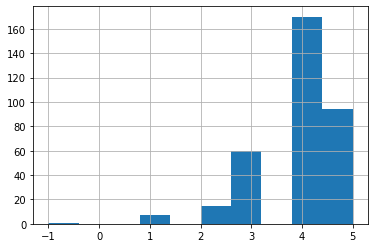

In [93]:
# смотрим на значения
describe_column(students, 'famrel')

Признак **famrel** числовой, но на самом деле он категориальный. Есть 26 пустых строк, принимает 5 уникальных значений.

Есть ошибка - указано значение "-1".

Исправляем ошибку, меняя знак значения, пустые строки заолняем медианой.

In [94]:
students.loc[students.famrel == -1.0, 'famrel'] = 1.0

In [95]:
# заполняем пустые строки новым значением
students.famrel = students.famrel.fillna(students.famrel.median())

Признак famrel имеет числовые значения.

Количество пустых строк: 0

Значения признака:
4.0    196
5.0     94
3.0     60
2.0     15
1.0      8
Name: famrel, dtype: int64

Распределение значений признака:
count    373.000000
mean       3.946381
std        0.875177
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64



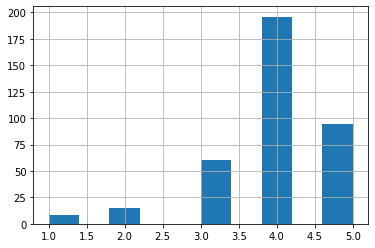

In [96]:
# смотрим на значения
describe_column(students, 'famrel')

# Freetime 

Признак freetime имеет числовые значения.

Количество пустых строк: 8

Значения признака:
3.0    146
4.0    106
2.0     61
5.0     35
1.0     17
Name: freetime, dtype: int64

Распределение значений признака:
count    365.000000
mean       3.221918
std        0.990372
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64



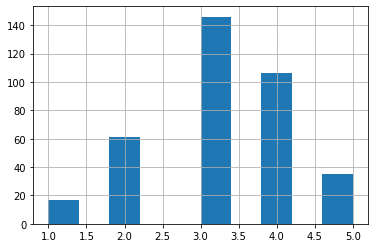

In [97]:
# смотрим на значения
describe_column(students, 'freetime')

Признак **freetime** числовой, но на самом деле он категориальный. Есть 8 пустых строк, принимает 5 уникальных значений.

Явных ошибок и выбросов нет, пустые строки заполняем медианой.

In [98]:
# заполняем пустые строки новым значением
students.freetime = students.freetime.fillna(students.freetime.median())

In [99]:
# проверяем пустые строки
students.freetime.isna().sum()

0

# Goout 

Признак goout имеет числовые значения.

Количество пустых строк: 7

Значения признака:
3.0    120
2.0     99
4.0     78
5.0     48
1.0     21
Name: goout, dtype: int64

Распределение значений признака:
count    366.000000
mean       3.090164
std        1.110380
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64



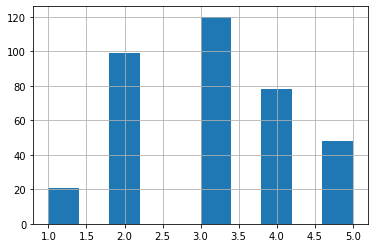

In [100]:
# смотрим на значения
describe_column(students, 'goout')

Признак **goout** числовой, но на самом деле он категориальный. Есть 7 пустых строк, принимает 5 уникальных значений.

Явных ошибок и выбросов нет, пустые строки заполняем медианой.

In [101]:
# заполняем пустые строки новым значением
students.goout = students.goout.fillna(students.goout.median())

In [102]:
# проверяем пустые строки
students.goout.isna().sum()

0

# Health 

Признак health имеет числовые значения.

Количество пустых строк: 15

Значения признака:
5.0    132
3.0     85
4.0     56
1.0     43
2.0     42
Name: health, dtype: int64

Распределение значений признака:
count    358.000000
mean       3.536313
std        1.395298
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64



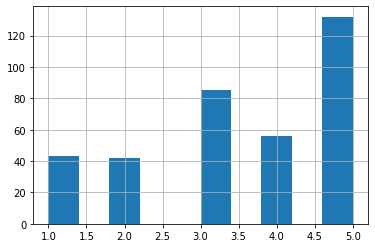

In [103]:
# смотрим на значения
describe_column(students, 'health')

Признак **health** числовой, но на самом деле он категориальный. Есть 15 пустых строк, принимает 5 уникальных значений.

Явных ошибок и выбросов нет, пустые строки заполняем медианой.

In [104]:
# заполняем пустые строки новым значением
students.health = students.health.fillna(students.health.median())

In [105]:
# проверяем пустые строки
students.health.isna().sum()

0

#  Корреляционный анализ количественных переменных

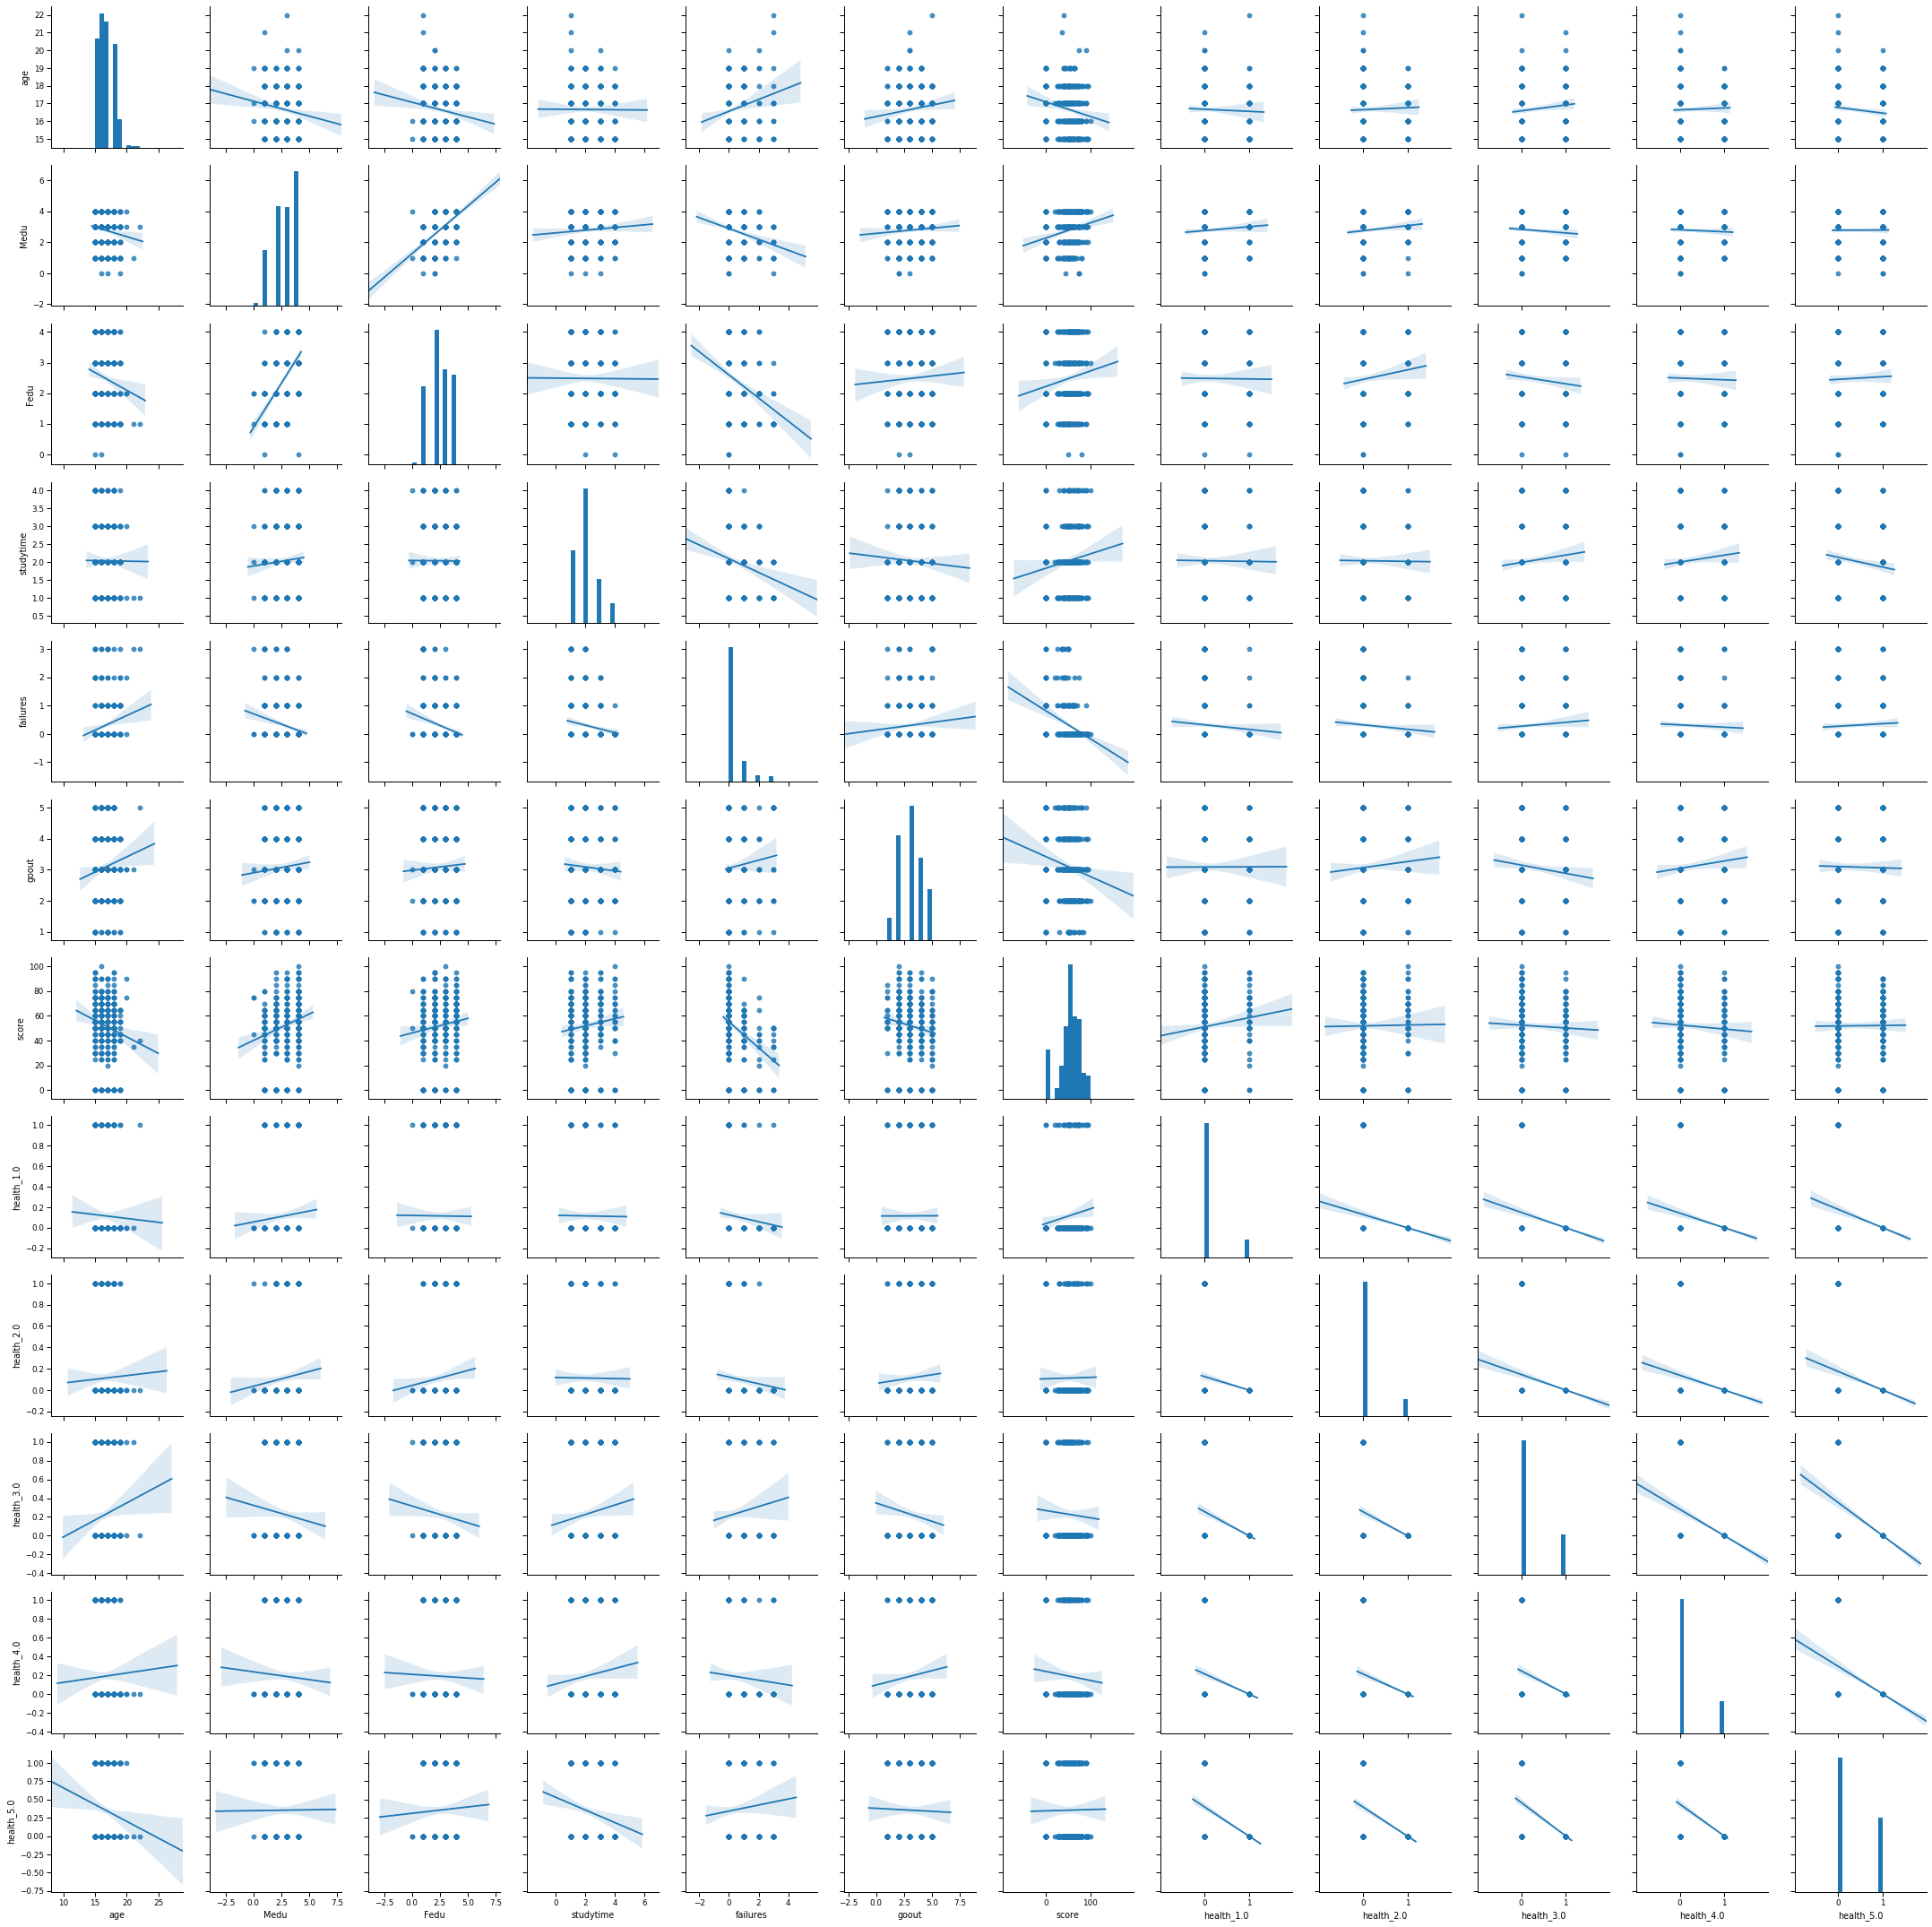

In [148]:
sns.pairplot(students, kind = 'reg')

In [107]:
students.corr()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.013972,-0.145286,-0.138511,0.074539,-0.004835,0.185247,0.004835,0.046721,0.009455,0.112323,-0.068361,0.194972,-0.148292
famsize,-0.013972,1.000000,0.070740,0.147667,-0.083338,0.067475,0.001463,-0.067475,0.010438,-0.040002,0.052677,0.013354,-0.046811,-0.018843
Medu,-0.145286,0.070740,1.000000,0.594773,-0.165824,0.067491,-0.226491,-0.067491,-0.015174,0.027130,0.067681,-0.065549,0.108305,0.203274
Fedu,-0.138511,0.147667,0.594773,1.000000,-0.104728,-0.003693,-0.251323,0.003693,-0.021264,-0.028649,0.041616,0.002047,0.037407,0.108826
traveltime,0.074539,-0.083338,-0.165824,-0.104728,1.000000,-0.102573,0.044144,0.102573,-0.034732,-0.005777,0.047738,-0.029987,-0.002801,-0.060002
studytime,-0.004835,0.067475,0.067491,-0.003693,-0.102573,1.000000,-0.159625,-1.000000,0.031837,-0.126750,-0.049853,-0.076985,-0.080893,0.107880
failures,0.185247,0.001463,-0.226491,-0.251323,0.044144,-0.159625,1.000000,0.159625,-0.016925,0.082581,0.082840,0.079922,0.112645,-0.320487
studytime_granular,0.004835,-0.067475,-0.067491,0.003693,0.102573,-1.000000,0.159625,1.000000,-0.031837,0.126750,0.049853,0.076985,0.080893,-0.107880
famrel,0.046721,0.010438,-0.015174,-0.021264,-0.034732,0.031837,-0.016925,-0.031837,1.000000,0.167158,0.074753,0.094393,-0.085619,0.059105
freetime,0.009455,-0.040002,0.027130,-0.028649,-0.005777,-0.126750,0.082581,0.126750,0.167158,1.000000,0.288806,0.056151,-0.014663,0.011045


(14.0, 0.0)

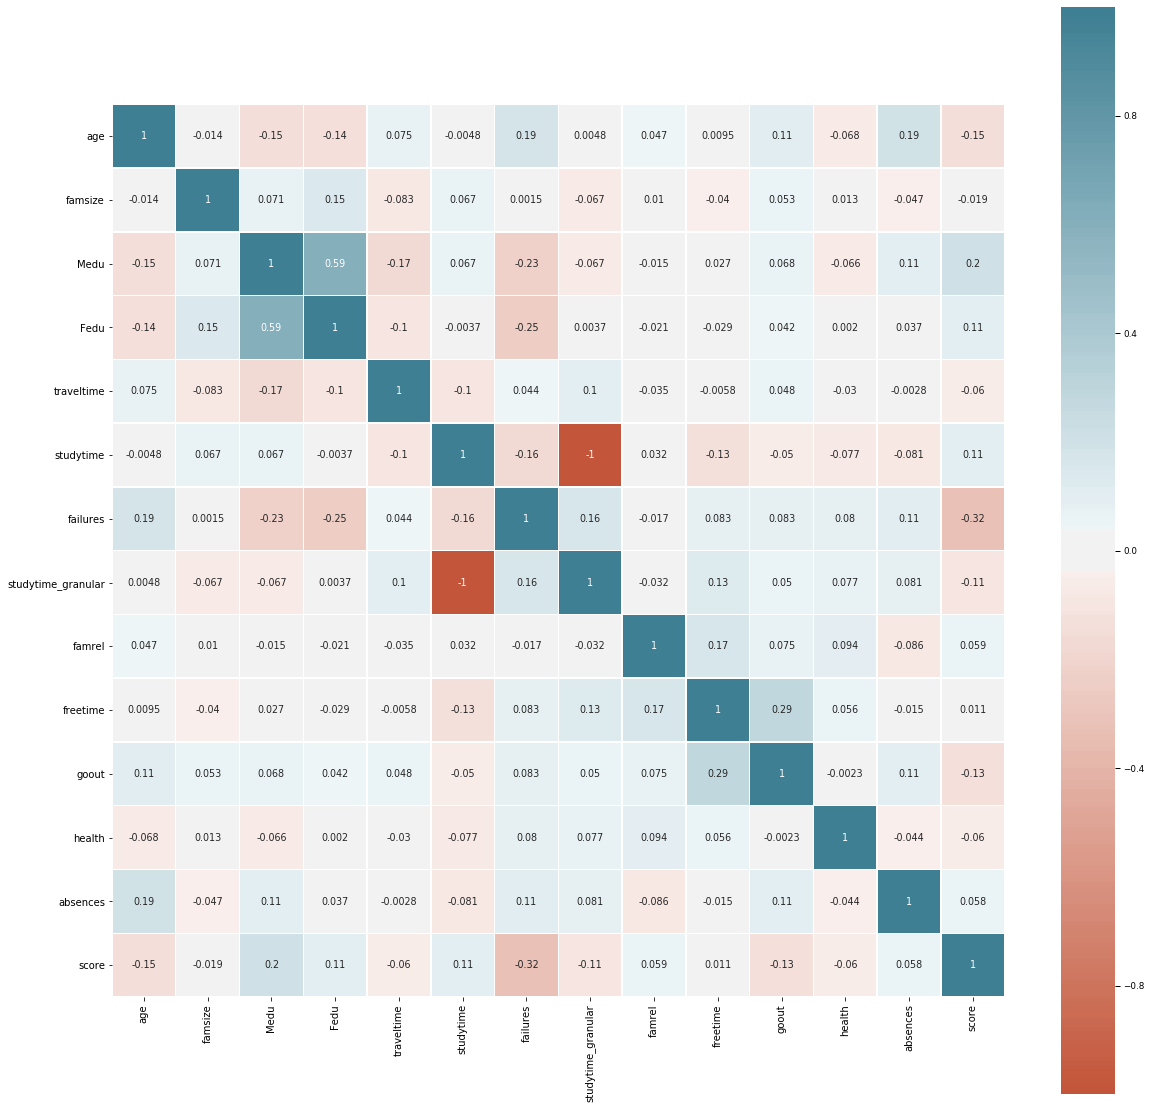

In [108]:
fig, ax = plt.subplots(figsize=(20,20))

sns.set_context('paper')
sns.heatmap(
    students.corr(),
    annot = True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    linewidths=.5,
    square=True)

# исправление отображения heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)



## Предварительные выводы по корреляционному анализу

1. Как и показал предварительный анализ, признак **studytime_granular** линейно зависим от признака **studytime**, коэффициент корреляции равен -1. Поэтому признак **studytime_granular** удаляем.
2. Признак **failures** (количество внеучебных неудач) имеет хорошую корреляцию с образованием родителей (**Medu**, **Fedu**), а также еще более сильную корреляцию с результатами по математике **score**.
3. Также хорошую скоррелированность с результатами **score** показывают возраст(**age**), время на учёбу помимо школы(**studytime**) и проведенное времени с друзьями(**goout**).
4. Признаки - кандидаты на удаление: **famsize, traveltime, famrel, freetime, health, absences**. 

Проведем дополнительный анализ значимости для колонок со слабой корреляцией.

## Анализ колонок для удаления - famsize

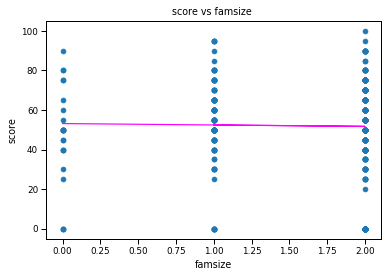

r - коэффициент корреляции между famsize and score: -0.018842772244418726

Уровень значимости нулевой гипотезы о независимости признаков: 0.7168102122290465


In [109]:
# смотрим значимость famsize
get_Scatter_Plot(students, 'famsize', 'score')

In [110]:
get_stat_dif(students, 'famsize', 'score')

Статистические различия для признаков famsize и score не найдены 


Таким образом кажется, что признак famsize незначим для результатов score. Но не торопимся удалаять!

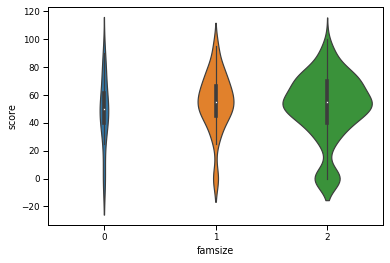

In [111]:
# посмотрим на распределение значений в графике violinplot
sns.violinplot(x='famsize', y='score', data=students, scale='count')
plt.show()

Возникает идея посмотреть на данные в колонках не как на числовые значения, а на категориальные. Для этого сделаем dummy variables и посмотрим их распределение и значимость

In [112]:
# создаем новые dummy признаки в отдельном датафрейме и score, чтобы не портить students
dummies = pd.get_dummies(students['famsize']).rename(columns=lambda x: 'famsize_' + str(x))

dummies['score'] = students['score']

In [113]:
# выбираем для анализа все dummy признаки, кроме score
columns_for_print = dummies.columns[:-1]
columns_for_print

Index(['famsize_0', 'famsize_1', 'famsize_2'], dtype='object')

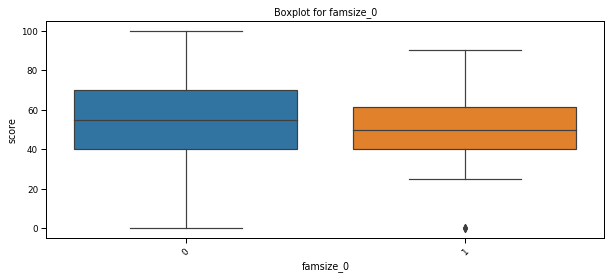

Статистические различия для признаков famsize_0 и score не найдены 


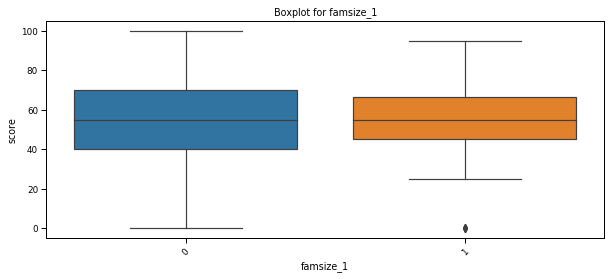

Статистические различия для признаков famsize_1 и score не найдены 


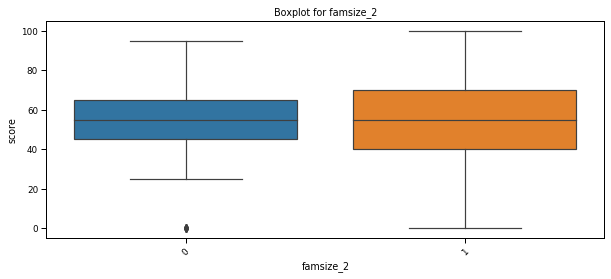

Статистические различия для признаков famsize_2 и score не найдены 


In [114]:
for column in columns_for_print:
    get_boxplot(dummies, column, 'score')
    get_stat_dif(dummies, column, 'score')

#### Вывод: колонку famsize удаляем

## Для удаления - traveltime

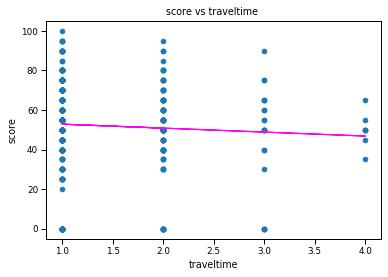

r - коэффициент корреляции между traveltime and score: -0.06000195770394526

Уровень значимости нулевой гипотезы о независимости признаков: 0.24768828123858744


In [115]:
# смотрим значимость traveltime
get_Scatter_Plot(students, 'traveltime', 'score')

In [116]:
get_stat_dif(students, 'traveltime', 'score')

Статистические различия для признаков traveltime и score не найдены 


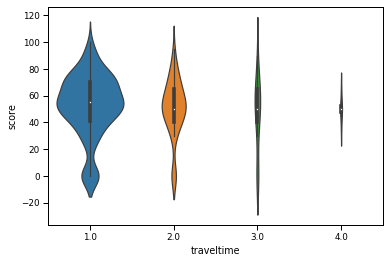

In [117]:
# посмотрим на распределение значений в графике violinplot
sns.violinplot(x='traveltime', y='score', data=students, scale='count')
plt.show()

In [118]:
# создаем новые dummy признаки в отдельном датафрейме и score, чтобы не портить students
dummies = pd.get_dummies(students['traveltime']).rename(columns=lambda x: 'traveltime_' + str(x))

dummies['score'] = students['score']

In [119]:
# выбираем для анализа все dummy признаки, кроме score
columns_for_print = dummies.columns[:-1]
columns_for_print

Index(['traveltime_1.0', 'traveltime_2.0', 'traveltime_3.0', 'traveltime_4.0'], dtype='object')

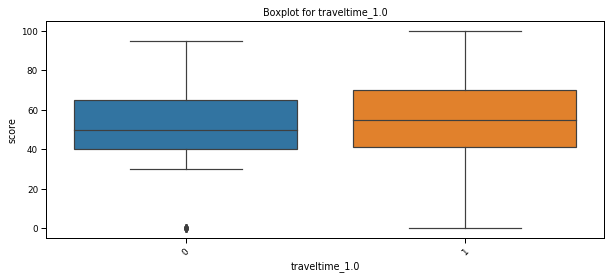

Статистические различия для признаков traveltime_1.0 и score не найдены 


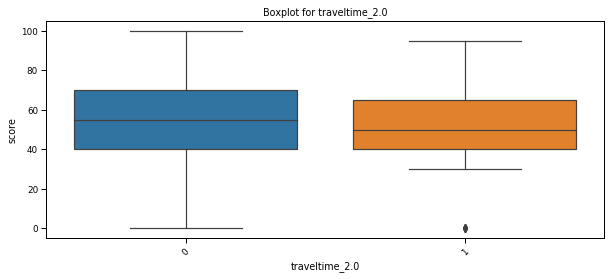

Статистические различия для признаков traveltime_2.0 и score не найдены 


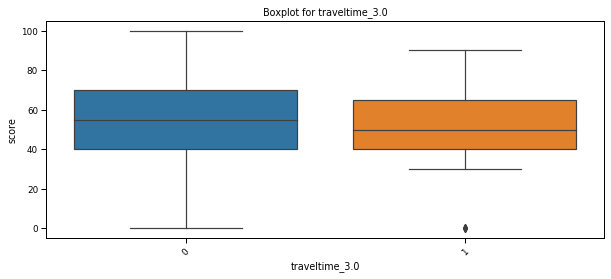

Статистические различия для признаков traveltime_3.0 и score не найдены 


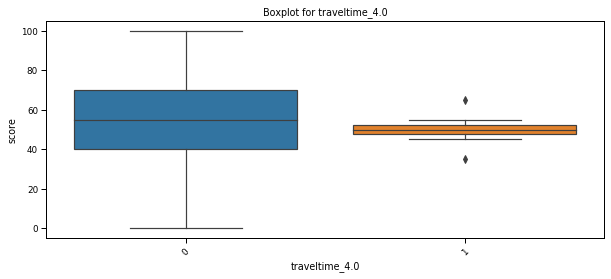

Статистические различия для признаков traveltime_4.0 и score не найдены 


In [120]:
for column in columns_for_print:
    get_boxplot(dummies, column, 'score')
    get_stat_dif(dummies, column, 'score')

###  Вывод: колонку traveltime удаляем

## Для удаления - famrel

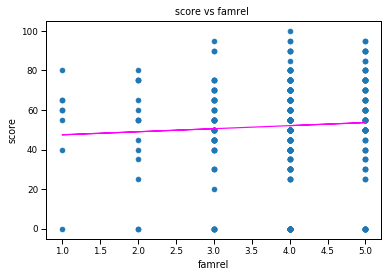

r - коэффициент корреляции между famrel and score: 0.059104839858152236

Уровень значимости нулевой гипотезы о независимости признаков: 0.25484147846624194


In [121]:
# смотрим значимость famrel
get_Scatter_Plot(students, 'famrel', 'score')

In [122]:
get_stat_dif(students, 'famrel', 'score')

Статистические различия для признаков famrel и score не найдены 


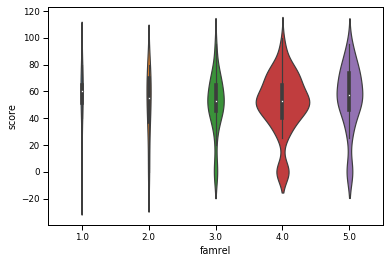

In [123]:
# посмотрим на распределение значений в графике violinplot
sns.violinplot(x='famrel', y='score', data=students, scale='count')
plt.show()

In [124]:
# создаем новые dummy признаки в отдельном датафрейме и score, чтобы не портить students
dummies = pd.get_dummies(students['famrel']).rename(columns=lambda x: 'famrel_' + str(x))

dummies['score'] = students['score']

In [125]:
# выбираем для анализа все dummy признаки, кроме score
columns_for_print = dummies.columns[:-1]
columns_for_print

Index(['famrel_1.0', 'famrel_2.0', 'famrel_3.0', 'famrel_4.0', 'famrel_5.0'], dtype='object')

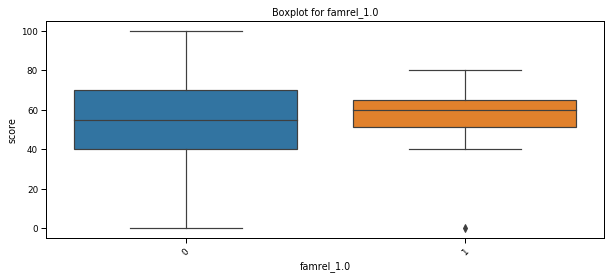

Статистические различия для признаков famrel_1.0 и score не найдены 


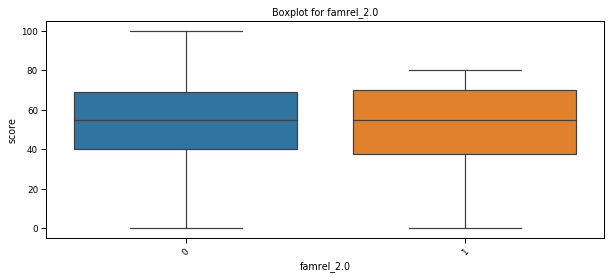

Статистические различия для признаков famrel_2.0 и score не найдены 


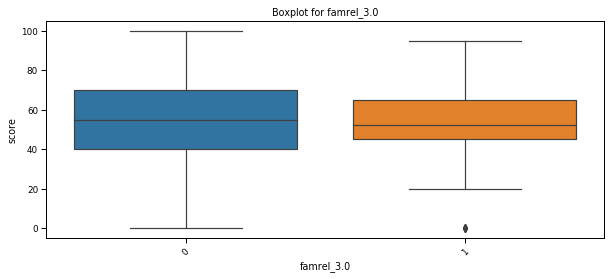

Статистические различия для признаков famrel_3.0 и score не найдены 


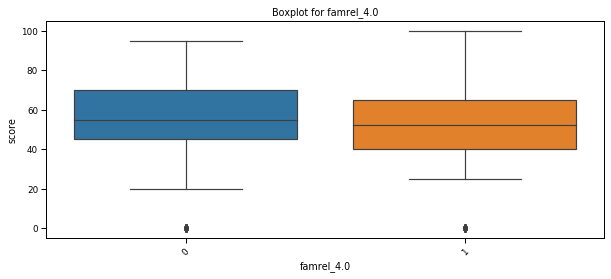

Статистические различия для признаков famrel_4.0 и score не найдены 


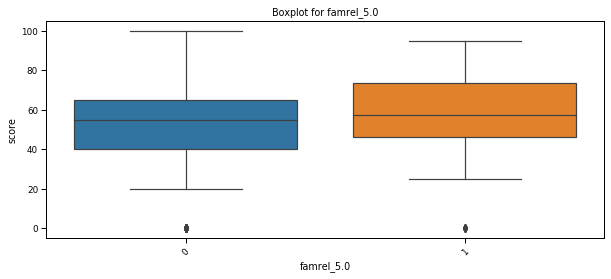

Статистические различия для признаков famrel_5.0 и score не найдены 


In [126]:
for column in columns_for_print:
    get_boxplot(dummies, column, 'score')
    get_stat_dif(dummies, column, 'score')

### Вывод: колонку famrel удаляем

## Для удаления - freetime

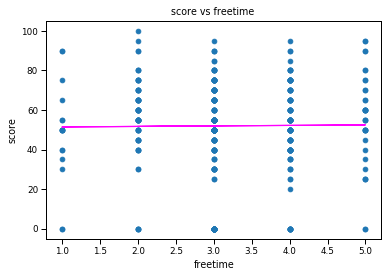

r - коэффициент корреляции между freetime and score: 0.011044601412152818

Уровень значимости нулевой гипотезы о независимости признаков: 0.8316411332217781


In [127]:
# смотрим значимость freetime
get_Scatter_Plot(students, 'freetime', 'score')

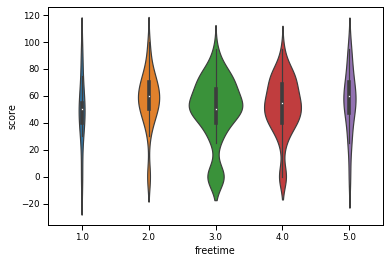

In [128]:
sns.violinplot(x='freetime', y='score', data=students, scale='count')
plt.show()

In [129]:
get_stat_dif(students, 'freetime', 'score')

Статистические различия для признаков freetime и score не найдены 


In [130]:
# создаем новые dummy признаки в отдельном датафрейме и score, чтобы не портить students
dummies = pd.get_dummies(students['freetime']).rename(columns=lambda x: 'freetime_' + str(x))

dummies['score'] = students['score']

In [131]:
# выбираем для анализа все dummy признаки, кроме score
columns_for_print = dummies.columns[:-1]
columns_for_print

Index(['freetime_1.0', 'freetime_2.0', 'freetime_3.0', 'freetime_4.0',
       'freetime_5.0'],
      dtype='object')

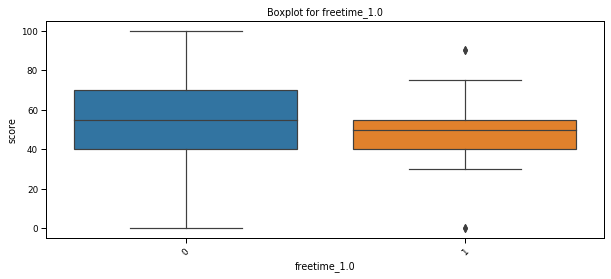

Статистические различия для признаков freetime_1.0 и score не найдены 


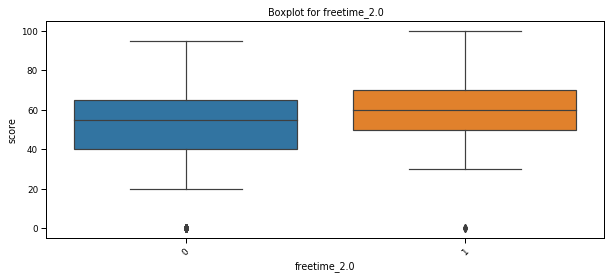

Статистические различия для признаков freetime_2.0 и score не найдены 


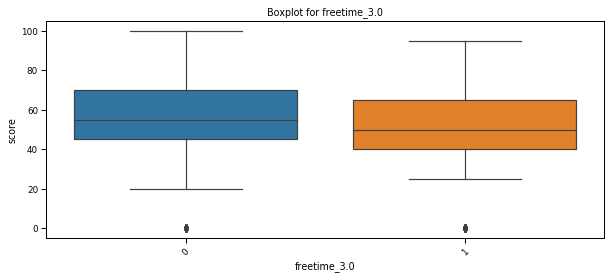

Статистические различия для признаков freetime_3.0 и score не найдены 


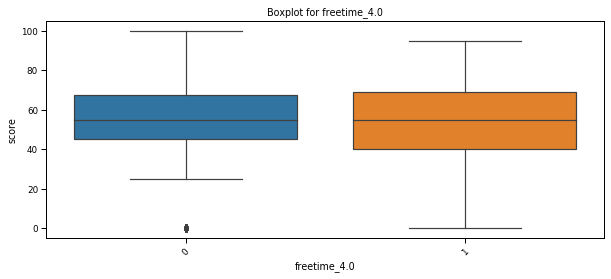

Статистические различия для признаков freetime_4.0 и score не найдены 


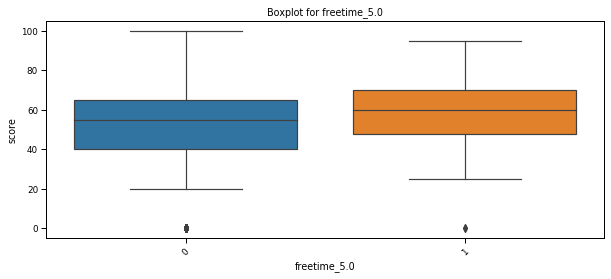

Статистические различия для признаков freetime_5.0 и score не найдены 


In [132]:
for column in columns_for_print:
    get_boxplot(dummies, column, 'score')
    get_stat_dif(dummies, column, 'score')

### Вывод: колонку freetime удаляем

## Для удаления - health

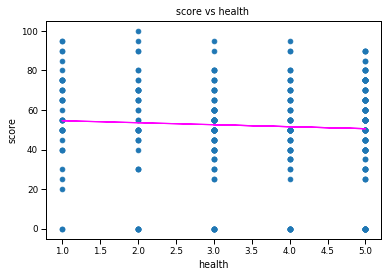

r - коэффициент корреляции между health and score: -0.0601470200522971

Уровень значимости нулевой гипотезы о независимости признаков: 0.24654490022170727


In [133]:
# смотрим значимость health
get_Scatter_Plot(students, 'health', 'score')

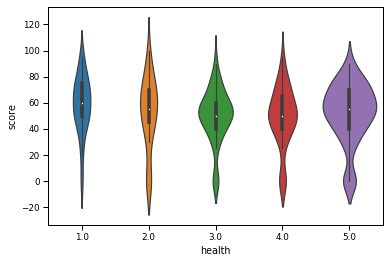

In [134]:
sns.violinplot(x='health', y='score', data=students, scale='count')
plt.show()

In [135]:
get_stat_dif(students, 'health', 'score')

Статистические различия для признаков health и score не найдены 


In [136]:
# создаем новые dummy признаки в отдельном датафрейме и score, чтобы не портить students
dummies = pd.get_dummies(students['health']).rename(columns=lambda x: 'health_' + str(x))

dummies['score'] = students['score']

In [137]:
# выбираем для анализа все dummy признаки, кроме score
columns_for_print = dummies.columns[:-1]
columns_for_print

Index(['health_1.0', 'health_2.0', 'health_3.0', 'health_4.0', 'health_5.0'], dtype='object')

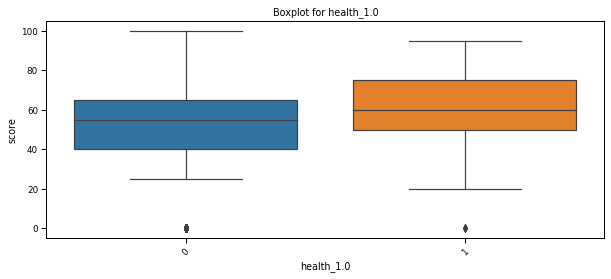

Внимание! Найдены статистически значимые различия для признаков health_1.0 и score


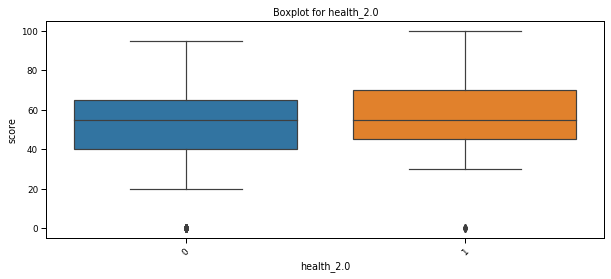

Статистические различия для признаков health_2.0 и score не найдены 


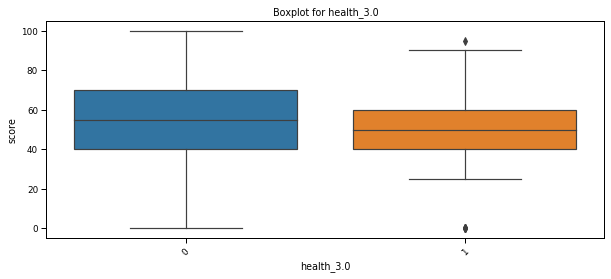

Статистические различия для признаков health_3.0 и score не найдены 


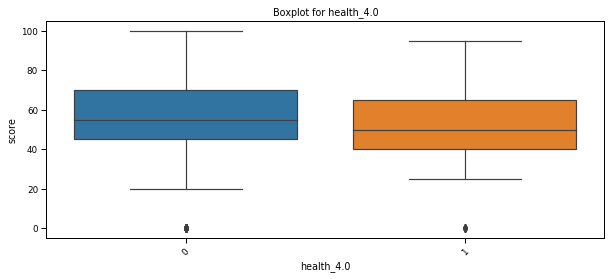

Статистические различия для признаков health_4.0 и score не найдены 


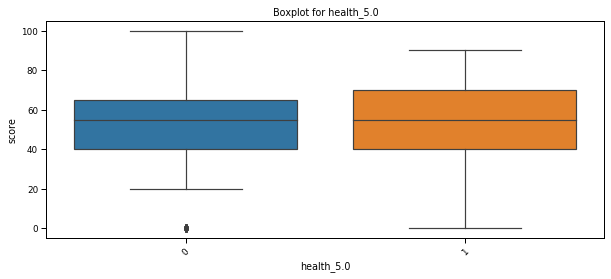

Статистические различия для признаков health_5.0 и score не найдены 


In [138]:
for column in columns_for_print:
    get_boxplot(dummies, column, 'score')
    get_stat_dif(dummies, column, 'score')

### Вывод: колонку health не удаляем

## Для удаления - absences

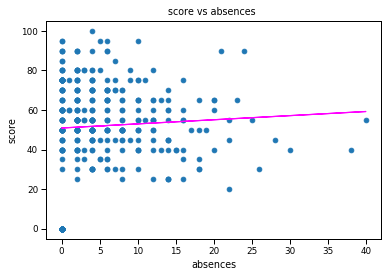

r - коэффициент корреляции между absences and score: 0.05808137146913349

Уровень значимости нулевой гипотезы о независимости признаков: 0.26317537388487294


In [139]:
# смотрим значимость absences
get_Scatter_Plot(students, 'absences', 'score')

In [140]:
get_stat_dif(students, 'absences', 'score')

Внимание! Найдены статистически значимые различия для признаков absences и score


### Вывод: колонку absences не удаляем !

# Вывод по корреляционному анализу 

Только признак **health** при создании dummy переменных показал значимость части своих значений.
Поэтому следующие признаки для удаления - **famsize, traveltime, famrel, freetime, absences** из-за слабой корреляции с целевым признаком score; **studytime_granular** из-за линейной зависимости от признака studytime.

На основе **health** создадим dummy переменные в датасет students.

In [141]:
dummies = pd.get_dummies(students['health']).rename(columns=lambda x: 'health_' + str(x))
students = pd.concat([students, dummies], axis=1)

# Анализ номинативных переменных 

In [142]:
columns_for_print = ['school', 'sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 
                     'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
                     'activities', 'nursery', 'higher', 'internet', 'romantic']

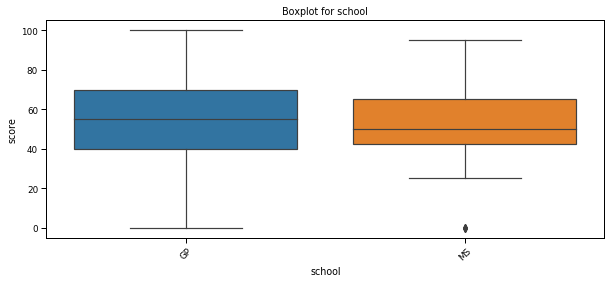

Статистические различия для признаков school и score не найдены 


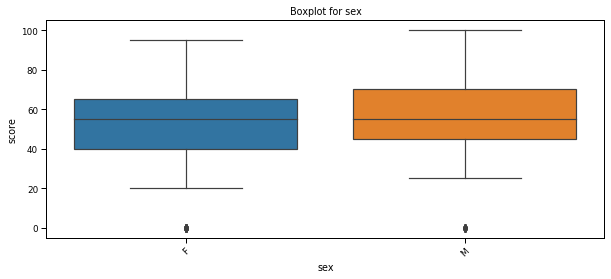

Внимание! Найдены статистически значимые различия для признаков sex и score


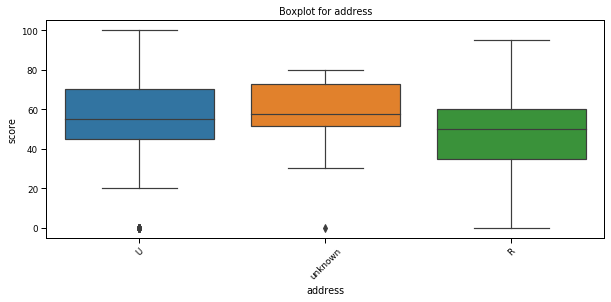

Внимание! Найдены статистически значимые различия для признаков address и score


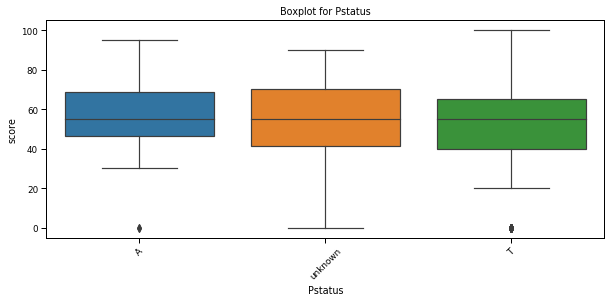

Статистические различия для признаков Pstatus и score не найдены 


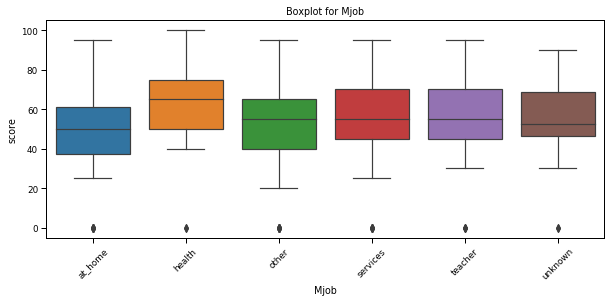

Статистические различия для признаков Mjob и score не найдены 


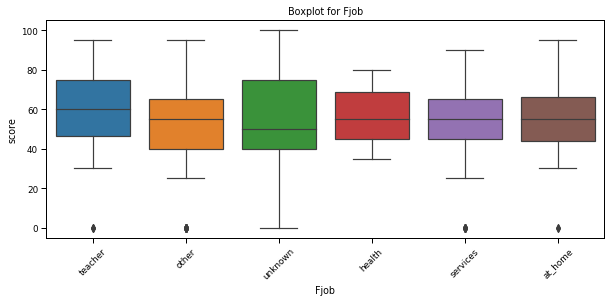

Статистические различия для признаков Fjob и score не найдены 


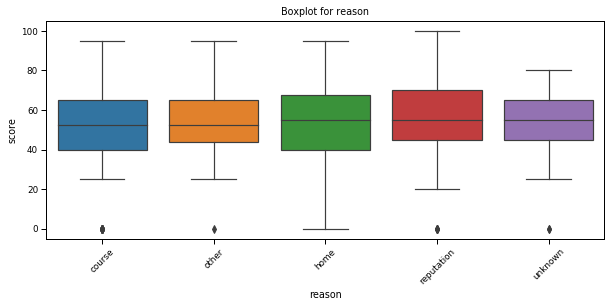

Статистические различия для признаков reason и score не найдены 


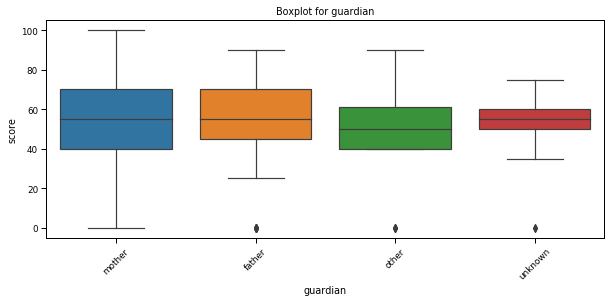

Статистические различия для признаков guardian и score не найдены 


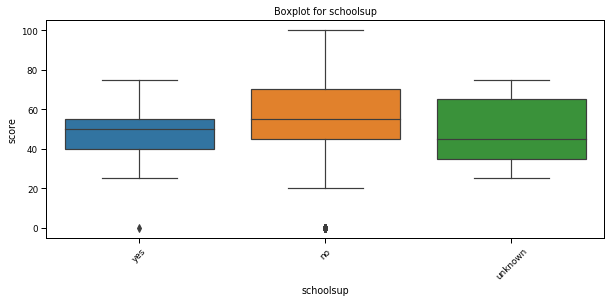

Статистические различия для признаков schoolsup и score не найдены 


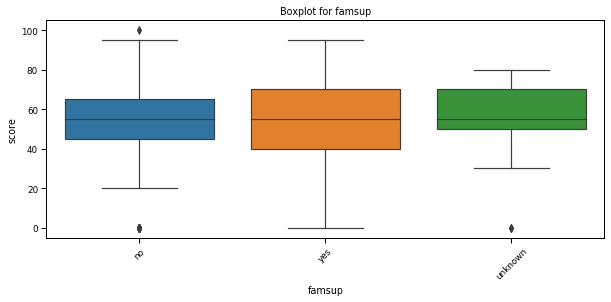

Статистические различия для признаков famsup и score не найдены 


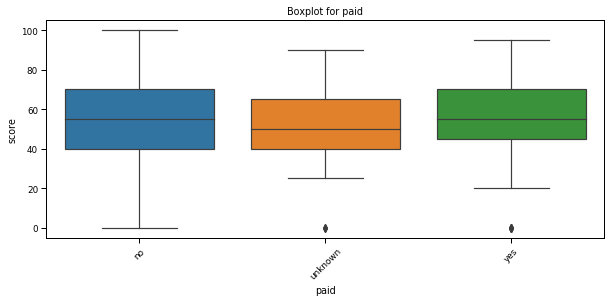

Статистические различия для признаков paid и score не найдены 


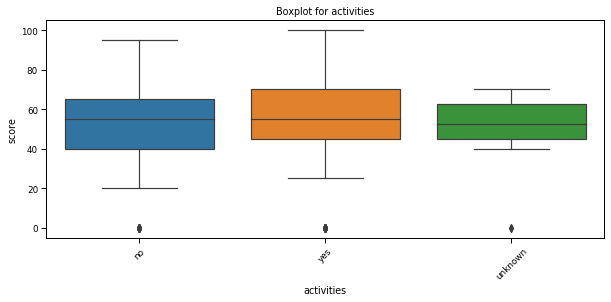

Статистические различия для признаков activities и score не найдены 


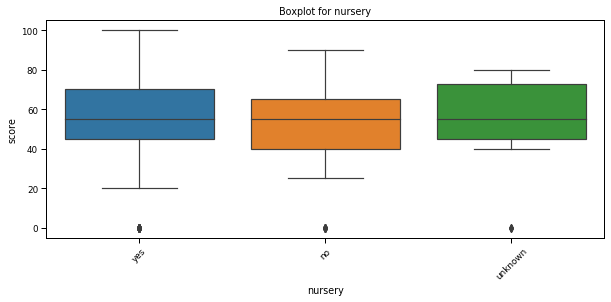

Статистические различия для признаков nursery и score не найдены 


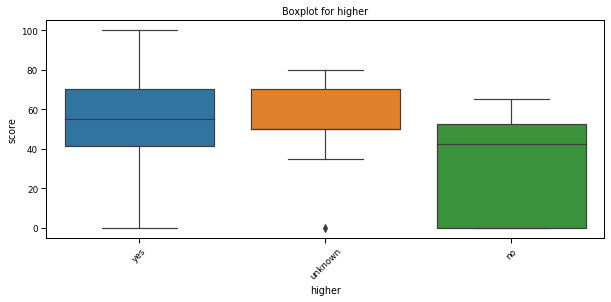

Внимание! Найдены статистически значимые различия для признаков higher и score


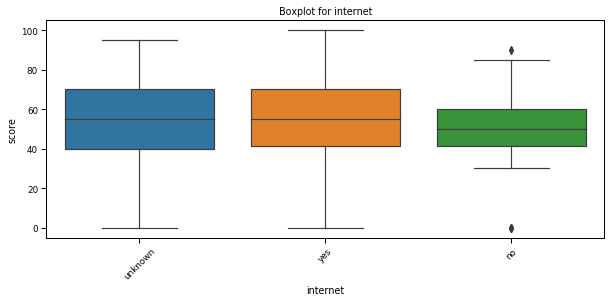

Статистические различия для признаков internet и score не найдены 


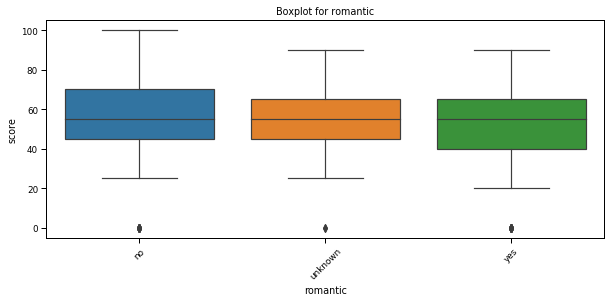

Статистические различия для признаков romantic и score не найдены 


In [143]:
for column in columns_for_print:
    get_boxplot(students, column, 'score')
    get_stat_dif(students, column, 'score')

# Вывод по номинативным переменным

Судя по графикам распределений и результатам теста Тьюринга, следующие признаки можно исключить как незначимые для анализа зависимости результатов по математике:
**school, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, internet, romantic**

# Удаление колонок 

In [144]:
# удаляем количественные переменные
students = students.drop(['famsize', 'traveltime', 'famrel', 'freetime',\
                  'absences', 'studytime_granular', 'health'], axis = 1)

# удаляем номинативные переменные 
students = students.drop(['school', 'Pstatus', 'Mjob', 'Fjob', 'reason',\
                          'guardian', 'schoolsup', 'famsup', 'paid', \
                          'activities', 'nursery', 'internet', 'romantic'], axis = 1)

In [145]:
# смотри итоговую информацию по обработанному датасету
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 394
Data columns (total 15 columns):
sex           373 non-null object
age           373 non-null int64
address       373 non-null object
Medu          373 non-null float64
Fedu          373 non-null float64
studytime     373 non-null float64
failures      373 non-null float64
higher        373 non-null object
goout         373 non-null float64
score         373 non-null float64
health_1.0    373 non-null uint8
health_2.0    373 non-null uint8
health_3.0    373 non-null uint8
health_4.0    373 non-null uint8
health_5.0    373 non-null uint8
dtypes: float64(6), int64(1), object(3), uint8(5)
memory usage: 37.5+ KB


In [146]:
students.columns

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'studytime', 'failures',
       'higher', 'goout', 'score', 'health_1.0', 'health_2.0', 'health_3.0',
       'health_4.0', 'health_5.0'],
      dtype='object')

In [147]:
students.shape

(373, 15)

# Итоговый вывод:

1. Признак **studytime_granular** линейно зависим от признака **studytime**, коэффициент корреляции равен -1. Поэтому признак **studytime_granular** удаляем.
2. Признак **failures** (количество внеучебных неудач) имеет хорошую корреляцию с образованием родителей (**Medu**, **Fedu**), а также еще более сильную корреляцию с результатами по математике **score**.
3. Также хорошую скоррелированность с результатами **score** показывают возраст(**age**), время на учёбу помимо школы(**studytime**) и проведенное времени с друзьями(**goout**).
4. Признак **health** при создании dummy переменных показал значимость части своих значений. На основе **health** созданы dummy переменные в датасет students.
5. Количественные признаки для удаления - **famsize, traveltime, famrel, freetime, absences** из-за слабой корреляции с целевым признаком score.
6. Номинативные признаки для удаления как незначимые по результатам теста Тьюринга: **school, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, internet, romantic**.

В датасете осталось 373 строки, 15 признаков. Пустые строки отсутствуют. Ошибки и выбросы обработаны.

Признаки, которые остались после обработок: 
* sex, 
* age, 
* address, 
* Medu, 
* Fedu, 
* studytime, 
* failures,
* higher, 
* goout,
* score,
* health_1.0,
* health_2.0,
* health_3.0,
* health_4.0, 
* health_5.0.